In [1]:
# https://www.kaggle.com/datasets/pkmisra/students-marks-dataset/code?resource=download

**STUDENT MARKS PREDICTION BASEED ON THE NUMBER OF HOURS STUDIED**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import rcParams

In [108]:
df = pd.read_csv('/content/student_info.csv')
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


**EXPLORING THE DATA**

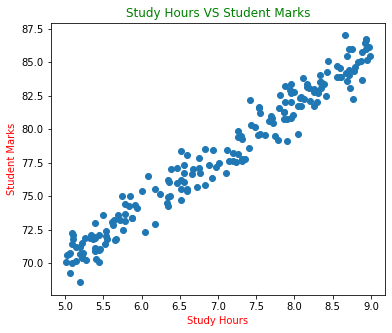

In [109]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("Study Hours", color="red")
plt.ylabel("Student Marks", color="red")
plt.title("Study Hours VS Student Marks", color="Green")
plt.show()

In [110]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [111]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [112]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [113]:
df.shape

(200, 2)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


**DATA PREPARATION BY REMOVING INCONSISTENT VAlUES**

In [115]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [116]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [117]:
df[df["study_hours"].isnull()]

,study_hours,student_marks
2,NaN,78.68
31,NaN,76.14
96,NaN,75.39
122,NaN,76.83
188,NaN,77.27


**FILL THE MISSING VALUES USING THE MEAN VALUE**

In [118]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [119]:
df2 = df.fillna(df.mean())

In [120]:
#After filling with mean values
loc = [2,31,96,122,188]
df2.loc[loc]

,study_hours,student_marks
2,6.995949,78.68
31,6.995949,76.14
96,6.995949,75.39
122,6.995949,76.83
188,6.995949,77.27


**SPLIT THE DATASET TO MAKE DEPENDENT AND INDEPENDENT COLUMNS**

In [121]:
X = df2.drop(columns="student_marks")
y = df2.drop(columns="study_hours")

In [122]:
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [123]:
X.head()

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000


In [124]:
y.head()

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19


**SPLIT THE DATASET INTO TRAINING AND TESTING DATASET**

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
print("shape of X_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", x_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


**MODEL CREATION**

In [130]:
model = LinearRegression()

In [131]:
model.fit(X=x_train, y=y_train)

LinearRegression()

In [132]:
y_pred = model.predict(X=x_test)

In [133]:
#test data
y_pred

array([[83.50507271],
       [70.84927186],
       [72.93236952],
       [85.35234799],
       [73.20749562],
       [84.48766595],
       [80.12495199],
       [81.85431608],
       [80.91102657],
       [82.20804964],
       [78.98514384],
       [84.84139951],
       [77.84533568],
       [77.68812077],
       [83.22994661],
       [85.78468901],
       [84.9593107 ],
       [72.61793968],
       [78.71001773],
       [79.18166248],
       [84.2911473 ],
       [85.6274741 ],
       [74.74034107],
       [81.3433676 ],
       [72.02838374],
       [80.40007809],
       [78.98514384],
       [82.09013845],
       [77.94732382],
       [82.24735337],
       [75.44780819],
       [84.60557713],
       [71.63534645],
       [75.48711192],
       [70.29901965],
       [78.98514384],
       [75.32989701],
       [84.52696967],
       [74.07217767],
       [71.4388278 ]])

In [134]:
df3 = pd.DataFrame(np.c_[x_test, y_test, y_pred], 
                   columns=["study_hours", "student_marks_original","student_marks_predicted"])

In [135]:
df3.head(10)

,study_hours,student_marks_original,student_marks_predicted
0,8.41,82.50,83.505073
1,5.19,71.18,70.849272
2,5.72,73.25,72.932370
3,8.88,83.64,85.352348
4,5.79,73.64,73.207496
5,8.66,86.99,84.487666
6,7.55,81.18,80.124952
7,7.99,82.75,81.854316
8,7.75,79.50,80.911027
9,8.08,81.70,82.208050


Intercept:  [50.45063632]
Slope:  [3.93037294]


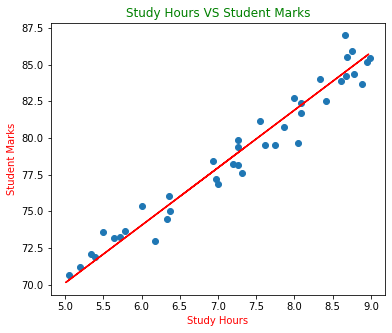

In [136]:
# plotting the regression line

print('Intercept: ' ,model.intercept_)
print('Slope: ', model.coef_[0])

plt.scatter(x_test, y_test)
plt.plot(x_train, model.predict(x_train), color = "r")
plt.xlabel("Study Hours", color="red")
plt.ylabel("Student Marks", color="red")
plt.title("Study Hours VS Student Marks", color="Green")
plt.show()

**EVALUATING THE MODEL**

In [137]:
y_pred = model.predict(x_test)
print('Mean Absolute Error: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('R2 Score: {:.3f}'.format(r2_score(y_test, y_pred)))

Mean Absolute Error: 0.857
Mean Squared Error: 1.044
R2 Score: 0.952


In [138]:
print('Training Set Accuracy: {:.3f}%'.format(model.score(x_train, y_train)*100))
print('Testing Set Accuracy: {:.3f}%'.format(model.score(x_test, y_test)*100))

Training Set Accuracy: 95.845%
Testing Set Accuracy: 95.218%


In [139]:
#user prediction
hours = int(input('Enter number of hours you studied to predict your score: '))
marks = model.predict([[hours]])
print('Your predicted marks are: {:.3f}'.format(marks[0][0]))

Enter number of hours you studied to predict your score: 9
Your predicted marks are: 85.824
